# Qiskit入門
各セルの実行結果と演習の解答例＋実行結果を保存してあるファイルです。

In [1]:
# Qiskitライブラリーを導入
from qiskit import *
from qiskit.visualization import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Qiskitバージョンの確認
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.2',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': None,
 'qiskit': '0.19.5'}

# 1) 1量子ビット回路
## 1.1) Xゲート

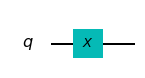

In [3]:
q = QuantumCircuit(1)    # １量子ビット回路を用意

q.x(0)   # Xゲートを0番目の量子ビットに操作します。

q.draw(output="mpl")    # 回路を描画

初期状態は|0>にセットされていますので、上記の量子回路は、行列ベクトル表示では

$X|0\rangle=  \begin{pmatrix}
0 & 1 \\\
1 & 0
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\begin{pmatrix}
0 \\\
1
\end{pmatrix} = |1\rangle$ 

となります。次にこの回路の出力ベクトルを状態ベクトルシミュレーターを使って実行してみます。

[0.+0.j 1.+0.j]


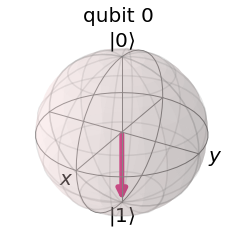

In [4]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

縦ベクトルが横ベクトルになり、複素数表示で表示されています。

## 1.2) Hゲート

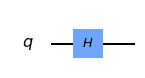

In [5]:
q = QuantumCircuit(1)    # １量子ビット回路を用意

q.h(0)   # Hゲートを0番目の量子ビットに操作します。

q.draw(output="mpl")    # 回路を描画

[0.707+0.j 0.707+0.j]


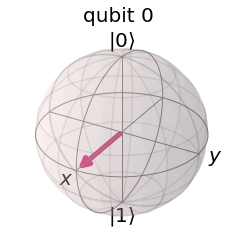

In [6]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

これは、$H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle+|1\rangle)=|+\rangle$ です。




つまり、$H$ゲートを$|0\rangle$に実行すると、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態が作れることが分かります。この状態は、$|+\rangle$とも書きます。

## 1.3) $|-\rangle$の状態をつくる

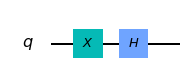

In [7]:
q = QuantumCircuit(1)    # １量子ビット回路を用意 

# Xゲートを0番目の量子ビットに操作します。
q.x(0)

# 次にHゲートを0番目の量子ビットに操作します。
q.h(0)

q.draw(output="mpl")    # 回路を描画

[ 0.707-0.j -0.707+0.j]


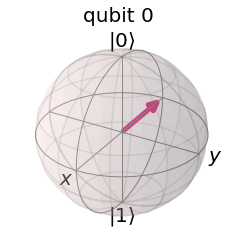

In [8]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

$H|1\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
0 \\\
1
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
-1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
-0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle-|1\rangle)=|-\rangle$


$|1\rangle$に$H$ゲートを実行した結果、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態になりますが、$|1\rangle$の符号がマイナスになります。この状態は$|-\rangle$とも書きます。

# 2) 2量子ビット回路
## 2.1) $|++\rangle$の状態をつくる

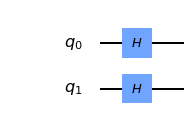

In [9]:
q = QuantumCircuit(2)    # 2量子ビット回路を用意  

q.h(0)    # Hゲートを0番目の量子ビットに操作します。
q.h(1)    # Hゲートを1番目の量子ビットに操作します。

q.draw(output="mpl")    # 回路を描画

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


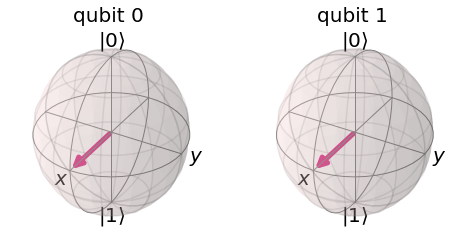

In [10]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

２量子ビットの状態は、１量子ビットの積（テンソル積）で表せます。

初期値 $|0\rangle\otimes|0\rangle=|00\rangle$に、$H$をそれぞれ操作させることで均等な重ね合わせの状態になります。

$|++\rangle=H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) =\frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$ 
=\frac{1}{2}\left( \begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}\right) = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}=\frac{1}{2}\left(\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}\right)
$$


## 2.2) CNOTゲート

$CNOT$ゲート（制御NOTゲート、CXゲートなどとも呼ばれます）は、２量子ビットにかかる量子ゲートで、制御ビットが1のときのみ、目標ビットの値を反転します。
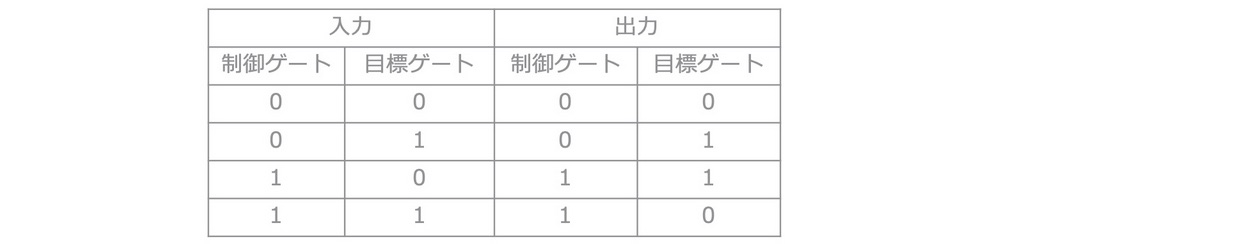
q0が1、q1が0の場合を計算してみましょう。

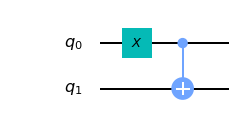

In [11]:
q = QuantumCircuit(2)    # 2量子ビット回路を用意

# q0=1, q1=0の場合：q0を1にします。
q.x(0)

# CXゲートの制御ビットをq0、目標ビットをq1にセットします。
q.cx(0,1)

q.draw(output="mpl")    # 回路を描画

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


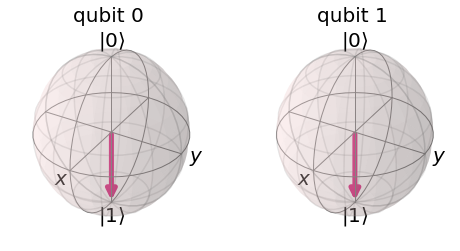

In [12]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

$|01\rangle$ にCNOTゲートを操作した結果、$|11\rangle$ になりました。<br><br>
$CNOT|01\rangle  = |11\rangle =|1\rangle \otimes |1\rangle=\begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix}=
\begin{bmatrix}
0 \\
0 \\
0 \\
1
\end{bmatrix} $

注意！：Qiskitでは、最下位ビット(LSB)が右端で、量子力学の教科書とは逆です。つまり、1量子ビット目が一番右のビットで、2量子ビット目が右から２番目のビットになります。$|01\rangle$ とは、q0が1で、q1が0を表しています。


演習でCNOTゲートの動きをさらに確認していきます。それぞれ量子回路を組んでシミュレーションし、ブロッホ球表示で確認してみましょう。「# コードを記入」の部分にコードを入れて実行してください。

## 演習1-(1) 
2量子ビット回路で、q0とq1がそれぞれ$|+\rangle$の重ね合わせの場合に、制御ビットをq0、目標ビットをq1でCNOTゲートを操作します。<br>

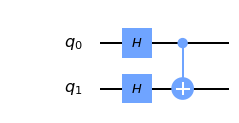

In [13]:
q = QuantumCircuit(2)    # 2量子ビット回路を用意

# q0とq1をそれぞれ|+⟩にします
q.h(0)
q.h(1)

# CXゲートの制御ビットをq0、目標ビットをq1にセットします。
q.cx(0,1)

q.draw(output="mpl")    # 回路を描画

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


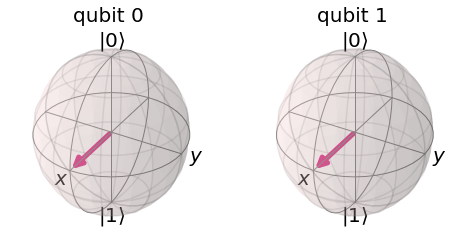

In [14]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

$|++\rangle$にCNOTをかけても状態は変わりません。<br>
$ CNOT |++\rangle  = CNOT(|00\rangle+|01\rangle+|10\rangle+|11\rangle)=|++\rangle$

## 演習1-(2) 
2量子ビット回路で、q0が$|+\rangle$、q1が$|-\rangle$の重ね合わせの場合に、制御ビットをq0、目標ビットをq1でCNOTゲートを操作します。<br>

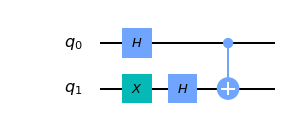

In [15]:
q = QuantumCircuit(2)    # 2量子ビット回路を用意

# q0を|+⟩、q1を|−⟩にします
q.h(0)
q.x(1)
q.h(1)

# CXゲートの制御ビットをq0、目標ビットをq1にセットします。
q.cx(0,1)

q.draw(output="mpl")    # 回路を描画

[ 0.5-0.j -0.5+0.j -0.5+0.j  0.5-0.j]


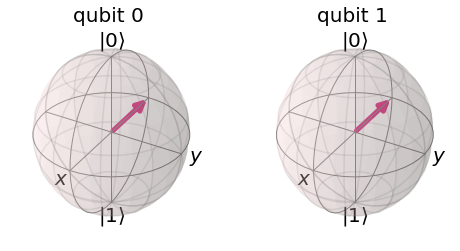

In [16]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

$|-+\rangle$にCNOTをかけると、目標ビットの状態は変わらず、制御ビットの状態が変わります。<br>
（これを位相キックバックといいます。）<br>

$ CNOT |-+\rangle  = CNOT(|00\rangle+|01\rangle-|10\rangle-|11\rangle)=|00\rangle+|11\rangle-|10\rangle-|01\rangle=|--\rangle$

## 演習1-(3) 
4量子ビット回路で、q0、q1、q2がすべて$|1\rangle$の場合に、3つのCNOTゲートをそれぞれq0、q1、q2を制御、q3を目標ビットで操作します。<br>

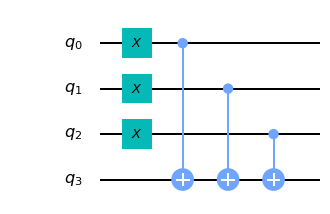

In [17]:
q = QuantumCircuit(4)    # 4量子ビット回路を用意

# q0、q1、q2をそれぞれ|1⟩にします
q.x(0)
q.x(1)
q.x(2)

# cxゲートを3つ追加します。制御/目標のペアは、q0/q3、q1/q3、q2/q3です。
q.cx(0,3)
q.cx(1,3)
q.cx(2,3)

q.draw(output='mpl')

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


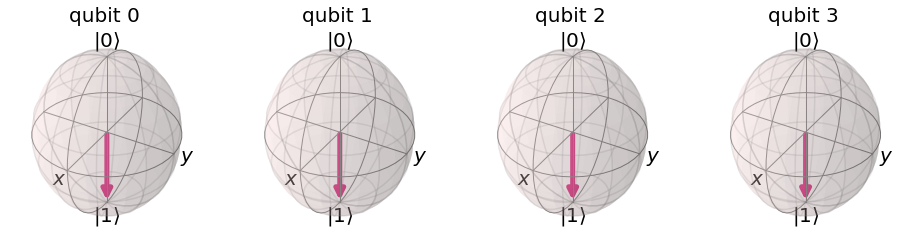

In [18]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

演習1-(3)の回路で、q0、q1、q2の入力を$|0\rangle$や$|1\rangle$に変えて、q3の状態がどうなるか実験してみましょう。<br>（この回路はドイチェ・ジョザのアルゴリズムで出てきます。）